### Select the Right Threshold values using ROC Curve

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# roc curve and auc score
from sklearn.datasets import make_classification
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score


# Finding Threshold for Every Individual Model

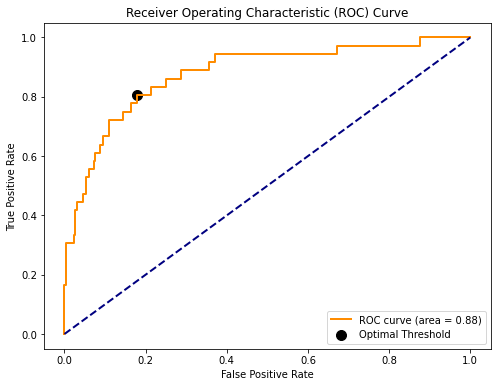

Accuracy: 0.82
Precision: 0.3815789473684211
Recall: 0.3815789473684211


In [2]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt
import numpy as np

# Generate a random binary classification dataset
X, y = make_classification(n_samples=1000, n_classes=2, weights=[0.9, 0.1], random_state=1)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Train a logistic regression model
clf = LogisticRegression()
clf.fit(X_train, y_train)

# Obtain predicted probabilities for test data
y_pred_prob = clf.predict_proba(X_test)[:, 1]

# Compute false positive rate and true positive rate
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Compute area under the ROC curve (AUC)
roc_auc = auc(fpr, tpr)

# Find the optimal threshold that maximizes the difference between TPR and FPR
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.scatter(fpr[optimal_idx], tpr[optimal_idx], marker='o', color='black', s=100, label='Optimal Threshold')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Use the optimal threshold to make predictions on test data
y_pred = (y_pred_prob >= optimal_threshold).astype(int)

# Compute and print performance metrics
accuracy = (y_pred == y_test).mean()
precision = (y_pred[y_pred==1] == y_test[y_pred==1]).mean()
recall = (y_pred[y_pred==1] == y_test[y_pred==1]).mean()

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)


# Finding Threshold After Comparing All the Models

#### Random Forests

In [3]:
from sklearn.model_selection import train_test_split
X, y = make_classification(n_samples=2000, n_classes=2, weights=[1,1], random_state=1)

In [4]:
## Apply RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
ytrain_pred = rf_model.predict_proba(X_train)
print('RF train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = rf_model.predict_proba(X_test)
print('RF test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

RF train roc-auc: 1.0
RF test roc-auc: 0.9007786195286195


#### Logistic Regression

In [5]:
from sklearn.linear_model import LogisticRegression
log_classifier=LogisticRegression()
log_classifier.fit(X_train, y_train)
ytrain_pred = log_classifier.predict_proba(X_train)
print('Logistic train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = log_classifier.predict_proba(X_test)
print('Logistic test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

Logistic train roc-auc: 0.9189462321137372
Logistic test roc-auc: 0.877209595959596


#### Adaboost Classifier

In [6]:
from sklearn.ensemble import AdaBoostClassifier
ada_classifier=AdaBoostClassifier()
ada_classifier.fit(X_train, y_train)
ytrain_pred = ada_classifier.predict_proba(X_train)
print('Adaboost train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = ada_classifier.predict_proba(X_test)
print('Adaboost test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

Adaboost train roc-auc: 0.9983003743769953
Adaboost test roc-auc: 0.8638468013468013


#### KNNClassifier

In [7]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier=KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)
ytrain_pred = knn_classifier.predict_proba(X_train)
print('Adaboost train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = knn_classifier.predict_proba(X_test)
print('Adaboost test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

Adaboost train roc-auc: 0.9533406830657571
Adaboost test roc-auc: 0.7708859427609427


#### No we will focus on selecting the best threshold for maximum accuracy

In [8]:
pred=[]
for model in [rf_model,log_classifier,ada_classifier,knn_classifier]:
    pred.append(pd.Series(model.predict_proba(X_test)[:,1]))
final_prediction=pd.concat(pred,axis=1).mean(axis=1)
print('Ensemble test roc-auc: {}'.format(roc_auc_score(y_test,final_prediction)))

Ensemble test roc-auc: 0.900357744107744


In [9]:
pd.concat(pred,axis=1)

,0,1,2,3
0,0.02,0.004079,0.443286,0.0
1,0.02,0.044289,0.465500,0.0
2,0.20,0.177575,0.498852,0.4
3,0.04,0.011229,0.432464,0.0
4,0.07,0.232872,0.478600,0.2
...,...,...,...,...
295,0.08,0.151893,0.471507,0.6
296,0.09,0.146474,0.466303,0.0
297,0.08,0.004977,0.460374,0.0
298,0.06,0.052433,0.479366,0.0


In [10]:
final_prediction

0      0.116841
1      0.132447
2      0.319107
3      0.120923
4      0.245368
         ...   
295    0.325850
296    0.175694
297    0.136338
298    0.147950
299    0.125749
Length: 300, dtype: float64

In [11]:
#### Calculate the ROc Curve


fpr, tpr, thresholds = roc_curve(y_test, final_prediction)
thresholds

array([1.7303074 , 0.7303074 , 0.57060586, 0.5533692 , 0.54644833,
       0.53895309, 0.52535278, 0.50529853, 0.49227057, 0.45762247,
       0.45603557, 0.44653794, 0.40998096, 0.36401494, 0.33002471,
       0.3258499 , 0.30992395, 0.30955201, 0.30112345, 0.28705015,
       0.2815381 , 0.25735958, 0.24536797, 0.21486431, 0.20935601,
       0.19470091, 0.19362614, 0.1669002 , 0.1633469 , 0.13633775,
       0.13602204, 0.12471819, 0.12442226, 0.08323513, 0.0831177 ,
       0.06040457])

In [12]:
from sklearn.metrics import accuracy_score
accuracy_ls = []
for thres in thresholds:
    y_pred = np.where(final_prediction>thres,1,0)
    accuracy_ls.append(accuracy_score(y_test, y_pred, normalize=True))
    
accuracy_ls = pd.concat([pd.Series(thresholds), pd.Series(accuracy_ls)],
                        axis=1)
accuracy_ls.columns = ['thresholds', 'accuracy']
accuracy_ls.sort_values(by='accuracy', ascending=False, inplace=True)
accuracy_ls.head()

,thresholds,accuracy
18,0.301123,0.913333
12,0.409981,0.910000
17,0.309552,0.910000
16,0.309924,0.910000
15,0.325850,0.910000


In [13]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

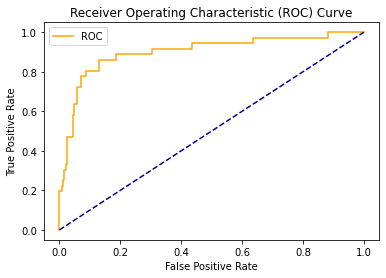

In [14]:
plot_roc_curve(fpr,tpr)

# Precision-Recall (PR) curve

Precision-Recall (PR) curve is another evaluation metric used to evaluate the performance of binary classification models. It is similar to ROC curve, but plots precision (positive predictive value) against recall (true positive rate) instead of true positive rate against false positive rate.

The PR curve is useful when the positive class is rare or when the cost of false positives and false negatives are not equal. In such cases, the PR curve provides a better picture of the classifier's performance than the ROC curve.

To find the optimal threshold using the PR curve, we need to select the threshold that maximizes the F1 score (harmonic mean of precision and recall) or some other metric that balances precision and recall.

We can plot the PR curve using scikit-learn's precision_recall_curve function, which returns the precision, recall, and threshold values for different probability thresholds. We can then plot the PR curve using Matplotlib.

In [ ]:
from sklearn.metrics import precision_recall_curve, f1_score
import matplotlib.pyplot as plt

# Train binary classifier and obtain predicted probabilities
# y_test: true labels of test data, y_pred: predicted probabilities
y_pred = clf.predict_proba(X_test)[:,1]

# calculate precision, recall, and threshold values for PR curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)

# calculate F1 score for each threshold value
f1_scores = [f1_score(y_test, y_pred >= t) for t in thresholds]

# identify the optimal operating point (cutoff point)
optimal_idx = np.argmax(f1_scores)
optimal_threshold = thresholds[optimal_idx]
print('Optimal Threshold: {:.3f}'.format(optimal_threshold))

# plot PR curve
plt.plot(recall, precision, label='PR curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()

# predict class labels using the optimal threshold
y_pred_optimal = (y_pred >= optimal_threshold).astype(int)

# evaluate performance using metrics such as accuracy, precision, and recall
